# Movie Genre analysis

#### Dataset: https://www.kaggle.com/beyjin/movies-1990-to-2017

## Import

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Preparation

In [2]:
## import Genre file
nRowsRead = None
genres = pd.read_csv("./data/Movie_Genres.csv", nrows=nRowsRead)
genres.dataframeName = 'Movie_Genres.csv'
nRow, nCol = genres.shape
print(f'There are {nRow} rows and {nCol} columns in {genres.dataframeName}')

There are 308565 rows and 3 columns in Movie_Genres.csv


In [3]:
## import Movies file
nRowsRead = None
movies = pd.read_csv("./data/Movie_Movies.csv", nrows=nRowsRead)
movies.dataframeName = 'Movie_Movies.csv'
nRow, nCol = movies.shape
print(f'There are {nRow} rows and {nCol} columns in {movies.dataframeName}')

There are 178687 rows and 18 columns in Movie_Movies.csv


/Users/sbalak/miniconda/envs/gis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movies.head()

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
0,NaN,USA,NaN,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,NaN,NaN,26 Apr 2012,20 min,Baby's Breath,movie,NaN,2012,tt2268369,NaN,NaN
1,NaN,USA,NaN,James Byrne,NaN,The struggle against unfortunate circumstances...,NaN,NaN,NaN,NaN,9 min,Winter Trees,movie,NaN,2008,tt1560760,NaN,NaN
2,NaN,USA,NaN,Dimitri Buchowetzki,NaN,NaN,NaN,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,NaN,1926,tt0016750,NaN,NaN
3,NaN,USA,NaN,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,NaN,NaN,27 May 2013,2 min,A Gift,movie,NaN,2013,tt3405286,NaN,NaN
4,NaN,Sri Lanka,NaN,Udara Siriruwan,Sinhalese,NaN,NaN,NaN,NaN,20 Mar 2014,23 min,Journey,movie,NaN,2014,tt3816698,NaN,NaN


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178687 entries, 0 to 178686
Data columns (total 18 columns):
Awards        20340 non-null object
Country       165998 non-null object
DVD           15949 non-null object
Director      151353 non-null object
Language      153196 non-null object
Plot          97476 non-null object
Poster        48414 non-null object
Production    16446 non-null object
Rated         23906 non-null object
Released      116974 non-null object
Runtime       119497 non-null object
Title         178686 non-null object
Type          178686 non-null object
Website       6747 non-null object
Year          178686 non-null object
imdbID        178686 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: float64(1), object(17)
memory usage: 24.5+ MB


In [6]:
#drop Columns which are not necessary
movies.drop(['Awards', 'DVD', 'Poster', 'Plot', 'Website', 'Production', 'Rated'], axis = 1, inplace = True)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178687 entries, 0 to 178686
Data columns (total 11 columns):
Country       165998 non-null object
Director      151353 non-null object
Language      153196 non-null object
Released      116974 non-null object
Runtime       119497 non-null object
Title         178686 non-null object
Type          178686 non-null object
Year          178686 non-null object
imdbID        178686 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: float64(1), object(10)
memory usage: 15.0+ MB


Reasoning why I kept the rest of the Columns
* Country: It may be interesting to see if there is a correlation between the Genre and Country
* Director: Does the Director has preferences of what he wants to produce?
* Released: Is there a relation between Releasedate, Imdb Rating and the Genre?
* Runtime: Is there an ideal Timeframe which might improve the imdb Rating?
* Year: Can we identify a hype in the production of some Genre?
* Language: Is there a preference of Genre within a Language which might be used to identify trends within a country

In [8]:
movies.head()

,Country,Director,Language,Released,Runtime,Title,Type,Year,imdbID,imdbRating,imdbVotes
0,USA,Rose Cummings,English,26 Apr 2012,20 min,Baby's Breath,movie,2012,tt2268369,NaN,NaN
1,USA,James Byrne,NaN,NaN,9 min,Winter Trees,movie,2008,tt1560760,NaN,NaN
2,USA,Dimitri Buchowetzki,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,1926,tt0016750,NaN,NaN
3,USA,Julia Hechler,English,27 May 2013,2 min,A Gift,movie,2013,tt3405286,NaN,NaN
4,Sri Lanka,Udara Siriruwan,Sinhalese,20 Mar 2014,23 min,Journey,movie,2014,tt3816698,NaN,NaN


### clean up movies dataset

In [9]:
movies.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
178682    False
178683    False
178684    False
178685    False
178686    False
Length: 178687, dtype: bool

In [10]:
#Why is Year column an object instead of int?
movies.Year.nunique()

265

In [11]:
movies.Year.unique()

array([2012, 2008, 1926, 2013, 2014, 2009, 1915, 1966, 2005, 2016, 2017,
       2002, 2015, 2004, 2011, 1986, 2001, 1953, 1990, 1970, 1934, 1997,
       1908, 2010, 1931, 2006, 1971, 2007, 1989, 1950, 1919, 1973, 1902,
       1959, 1964, 1916, 1995, 1914, 1939, 1991, 1912, 1918, 1975, 1967,
       1957, 1994, 1996, 1992, 1913, 1910, 1993, 1969, 1907, 1911, 1999,
       1987, 1972, 1937, 1958, 1925, 1928, 1983, 2003, 1984, 1998, 2000,
       2018, 1956, 1988, 1982, 1955, 1932, 1952, 1906, 1960, 1933, 1927,
       1917, 1974, 1901, 1985, 1980, 1977, 1920, 1899, 1962, 1981, 1979,
       1921, 1936, 1946, 1930, 1905, 1965, 1923, 1942, 1961, 1903, 1898,
       1943, 1978, 1909, 1948, 1924, 1929, 1976, 1949, 1947, 1922, 1940,
       1938, 1954, 1941, 1900, 1935, 1944, 1968, 1904, 1951, 1895, 1963,
       2019, 1945, 1896, 1897, 2020, 1889, 1894, 2021, 1890, 2023, 1891.0,
       nan, 2022, '1896', '1938', '1987', '2008', '2012', '2015', '1978',
       '2011', '2007', '2014', '2004', '1912', '

In [12]:
def validateColumnType(dfSeriesColumn, expectType = int):
    typeStats = {}
    for value in dfSeriesColumn:
        if type(value) != expectType:
            typeName = type(value).__name__
            if typeName in typeStats.keys():
                if value not in typeStats[typeName]:
                    typeStats[typeName].append(value)
            else:
                typeStats[typeName] = []
                typeStats[typeName].append(value)
    return typeStats

In [13]:
yearInfo = validateColumnType(movies.Year, int)

In [14]:
yearInfo.keys()

dict_keys(['float', 'str'])

In [15]:
print(yearInfo['float'][0:10])
print(yearInfo['float'][-10:-1])
print(len(yearInfo['float']))

[1919.0, 2006.0, 2008.0, 2014.0, 2017.0, 2007.0, 1997.0, 2009.0, 1911.0, 1996.0]
[1907.0, 1961.0, 1900.0, 1899.0, 1897.0, 1895.0, 2021.0, 1891.0, nan]
130


In [16]:
print(yearInfo['str'][0:10])
print(yearInfo['str'][-10:-1])
print(len(yearInfo['str']))

['1896', '1938', '1987', '2008', '2012', '2015', '1978', '2011', '2007', '2014']
['1943', '1895', '1945', '1897', '2021', '1894', '2003–2005', '2007–2011', '2010–2013']
132


In [17]:
# If year has multiple values, choose the first one.
def cleanYear(x):
    if type(x) is str:
        x = x.split("–")[0]
        return x
    else:
        return x

In [18]:
# Drop rows with missing or Nan values for Year column
movies = movies.dropna(subset=['Year'])

# Clean up year data and convert values to Int16
movies.Year = movies.Year.apply(lambda x : cleanYear(x)).astype("Float16").astype("Int16")

In [19]:
movies.Year.unique()

<IntegerArray>
[2012, 2008, 1926, 2013, 2014, 2009, 1915, 1966, 2005, 2016,
 ...
 1896, 1897, 2020, 1889, 1894, 2021, 1890, 2023, 1891, 2022]
Length: 133, dtype: Int16

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178686 entries, 0 to 178686
Data columns (total 11 columns):
Country       165998 non-null object
Director      151353 non-null object
Language      153196 non-null object
Released      116974 non-null object
Runtime       119497 non-null object
Title         178686 non-null object
Type          178686 non-null object
Year          178686 non-null Int16
imdbID        178686 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: Int16(1), float64(1), object(9)
memory usage: 15.5+ MB


In [21]:
yearInfo = validateColumnType(movies.Year, int)
yearInfo.keys()

dict_keys(['int16'])

In [22]:
movies.imdbRating.nunique()

91

In [23]:
movies.imdbRating.unique()

array([ nan,  6.9,  2.4,  6.3,  5.5,  5. ,  7.6,  6.8,  7.2,  7.4,  7.1,
        5.4,  5.9,  5.8,  5.1,  4.8,  3.7,  5.3,  7.3,  7.9,  7.8,  7. ,
        7.5,  6.6,  6.4,  5.7,  4. ,  6.1,  6.5,  3.1,  6.2,  5.6,  3.5,
        6.7,  8.6,  3.6,  4.1,  8.5,  6. ,  8.1,  4.7,  2.3,  3.9,  8. ,
        7.7,  8.9,  3.2,  8.2,  9. ,  4.4,  4.3,  4.6,  8.4,  3.3,  2.6,
        2.8,  8.3,  4.9,  8.8,  3.4,  5.2,  1.9,  2.5,  4.5,  9.2,  3.8,
        8.7,  2.9,  4.2,  9.1,  2.1,  9.7,  9.3,  3. ,  2. ,  1.2,  2.7,
       10. ,  1.8,  9.4,  9.8,  1.4,  1. ,  1.3,  9.5,  9.6,  1.6,  2.2,
        9.9,  1.5,  1.7,  1.1])

In [24]:
# Drop rows with missing or Nan values for imdbRating column
movies = movies.dropna(subset=['imdbRating'])

In [25]:
movies = movies.reset_index(drop=True)

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62073 entries, 0 to 62072
Data columns (total 11 columns):
Country       59837 non-null object
Director      58175 non-null object
Language      57540 non-null object
Released      49784 non-null object
Runtime       53269 non-null object
Title         62073 non-null object
Type          62073 non-null object
Year          62073 non-null Int16
imdbID        62073 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: Int16(1), float64(1), object(9)
memory usage: 4.9+ MB


### clean up  genres dataset

In [27]:
genres.head()

,Unnamed: 0,Genre,imdbID
0,0,Short,tt2268369
1,1,Drama,tt2268369
2,2,Short,tt1560760
3,3,Drama,tt1560760
4,4,Drama,tt0016750


In [28]:
#drop Columns which are not necessary
genres.drop(['Unnamed: 0'], axis = 1, inplace = True)
genres.head()

,Genre,imdbID
0,Short,tt2268369
1,Drama,tt2268369
2,Short,tt1560760
3,Drama,tt1560760
4,Drama,tt0016750


In [29]:
genres.Genre.nunique()

56

In [30]:
genres.Genre.unique()

array(['Short', ' Drama', 'Drama', ' Romance', 'Documentary', ' Short',
       ' Crime', ' Comedy', ' Mystery', 'Sport', 'Horror', ' Thriller',
       'Music', 'Comedy', ' Horror', 'Animation', ' Family', ' Sci-Fi',
       'Adventure', 'Adult', ' War', ' Music', 'Western', 'Romance',
       'Thriller', 'Crime', 'Fantasy', ' Biography', ' Action',
       'Biography', ' Western', 'Reality-TV', 'Action', ' Adventure',
       ' History', ' Documentary', ' News', ' Fantasy', ' Musical',
       'History', 'Sci-Fi', ' Reality-TV', 'Family', ' Sport',
       ' Animation', ' Adult', 'News', 'Musical', 'Mystery', ' Game-Show',
       'Talk-Show', 'Film-Noir', ' Talk-Show', ' Film-Noir', 'War',
       'Game-Show'], dtype=object)

In [31]:
#Cleanly format the Genre column
genres.Genre = genres.Genre.apply(lambda x: x.strip()).astype(str)
#genres = genres.reset_index(drop=True)

In [32]:
genres.Genre.unique()

array(['Short', 'Drama', 'Romance', 'Documentary', 'Crime', 'Comedy',
       'Mystery', 'Sport', 'Horror', 'Thriller', 'Music', 'Animation',
       'Family', 'Sci-Fi', 'Adventure', 'Adult', 'War', 'Western',
       'Fantasy', 'Biography', 'Action', 'Reality-TV', 'History', 'News',
       'Musical', 'Game-Show', 'Talk-Show', 'Film-Noir'], dtype=object)

In [33]:
genres.Genre.nunique()

28

In [34]:
genres.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
308560    False
308561    False
308562    False
308563    False
308564    False
Length: 308565, dtype: bool

In [35]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308565 entries, 0 to 308564
Data columns (total 2 columns):
Genre     308565 non-null object
imdbID    308565 non-null object
dtypes: object(2)
memory usage: 4.7+ MB


### merge both movies & genres datasets

In [36]:
data = pd.merge(movies, genres, on='imdbID')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111552 entries, 0 to 111551
Data columns (total 12 columns):
Country       107958 non-null object
Director      105986 non-null object
Language      104251 non-null object
Released      92127 non-null object
Runtime       99676 non-null object
Title         111552 non-null object
Type          111552 non-null object
Year          111552 non-null Int16
imdbID        111552 non-null object
imdbRating    111552 non-null float64
imdbVotes     111484 non-null object
Genre         111552 non-null object
dtypes: Int16(1), float64(1), object(10)
memory usage: 10.5+ MB


## Analysis questions

### 1: Can we identify a hype of some Genre over the last decades?

In [44]:
data.Genre.unique()

array(['Documentary', 'Short', 'Horror', 'Thriller', 'Music', 'Comedy',
       'Romance', 'Animation', 'Drama', 'Family', 'Adventure', 'Adult',
       'Western', 'Crime', 'Fantasy', 'Biography', 'Sci-Fi', 'Action',
       'Sport', 'News', 'War', 'Mystery', 'History', 'Musical',
       'Game-Show', 'Film-Noir', 'Reality-TV', 'Talk-Show'], dtype=object)

In [56]:
genGroups = data.groupby('Genre')['imdbID'].count().reset_index()
print(genGroups.shape)
print(genGroups)

(28, 2)
          Genre  imdbID
0        Action    5284
1         Adult    2474
2     Adventure    3649
3     Animation    3547
4     Biography    1868
5        Comedy   14824
6         Crime    4218
7   Documentary   11015
8         Drama   19992
9        Family    3142
10      Fantasy    2006
11    Film-Noir     155
12    Game-Show      35
13      History    1323
14       Horror    4124
15        Music    3063
16      Musical     980
17      Mystery    2002
18         News     194
19   Reality-TV     169
20      Romance    5003
21       Sci-Fi    1823
22        Short   13642
23        Sport    1073
24    Talk-Show      45
25     Thriller    3993
26          War     995
27      Western     914


In [57]:
genGroups.sort_values('imdbID', ascending = False, inplace = True)
print(genGroups)

          Genre  imdbID
8         Drama   19992
5        Comedy   14824
22        Short   13642
7   Documentary   11015
0        Action    5284
20      Romance    5003
6         Crime    4218
14       Horror    4124
25     Thriller    3993
2     Adventure    3649
3     Animation    3547
9        Family    3142
15        Music    3063
1         Adult    2474
10      Fantasy    2006
17      Mystery    2002
4     Biography    1868
21       Sci-Fi    1823
13      History    1323
23        Sport    1073
26          War     995
16      Musical     980
27      Western     914
18         News     194
19   Reality-TV     169
11    Film-Noir     155
24    Talk-Show      45
12    Game-Show      35


In [60]:
top10Genre = genGroups.head(10)
print(top10Genre)

          Genre  imdbID
8         Drama   19992
5        Comedy   14824
22        Short   13642
7   Documentary   11015
0        Action    5284
20      Romance    5003
6         Crime    4218
14       Horror    4124
25     Thriller    3993
2     Adventure    3649


In [63]:
top10GenreList = top10Genre.Genre.to_list()
print(top10GenreList)

['Drama', 'Comedy', 'Short', 'Documentary', 'Action', 'Romance', 'Crime', 'Horror', 'Thriller', 'Adventure']


In [66]:
#Filter dataset for 10 top genre
print(f'Before filter dataset size is {data.shape}')
dataTop10Genre = data[data.Genre.isin(top10GenreList)]
print(f'After filter dataset size is {dataTop10Genre.shape}')

Before filter dataset size is (111552, 12)
After filter dataset size is (85744, 12)


In [72]:
yearGenre = dataTop10Genre.groupby(['Year', 'Genre'])

#### Review in which timeframe we have the most Hits
Due to the improvement of the given Dataset which also contains movie before the year 1990 - I´d like to make sure that further analysis on the rating of a movie is not misunderstood because of too less input.

In [75]:
yearMovieCount = dataTop10Genre.groupby(['Year'])['imdbID'].count()

In [76]:
yearMovieCount

Year
1889       3
1890       3
1891       2
1894      15
1895      19
        ... 
2014    3320
2015    2782
2016    2393
2017    1639
2018     125
Name: imdbID, Length: 128, dtype: int64

In [79]:
# The output looks good for the timeseries for years 1990 - 2016. I´ll be filtering for this Timeframe
data26Years = data[(dataTop10Genre.Year >= 1990) & (data.Year <= 2016)]

In [80]:
yearGenre = data26Years.groupby(['Year', 'Genre'])

In [83]:
yearGenre.head()

,Country,Director,Language,Released,Runtime,Title,Type,Year,imdbID,imdbRating,imdbVotes,Genre
0,USA,NaN,English,NaN,10 min,Beyond Batman: Visualizing Gotham - The Produc...,movie,2005,tt1006835,6.9,35,Documentary
1,USA,NaN,English,NaN,10 min,Beyond Batman: Visualizing Gotham - The Produc...,movie,2005,tt1006835,6.9,35,Short
2,USA,Matt Hish,English,01 Feb 2014,97 min,Haunting of the Innocent,movie,2014,tt2554714,2.4,345,Horror
3,USA,Matt Hish,English,01 Feb 2014,97 min,Haunting of the Innocent,movie,2014,tt2554714,2.4,345,Thriller
5,China,Fendou Liu,Mandarin,24 Jun 2011,93 min,The Pretending Lovers,movie,2011,tt1990255,5.5,43,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...
25477,USA,Dan Poole,English,NaN,46 min,The Green Goblin's Last Stand,movie,1992,tt0360619,7.0,102,Adventure
25778,USA,Bill Phillips,English,30 Oct 1992,88 min,There Goes the Neighborhood,movie,1992,tt0105573,5.8,892,Crime
25824,USA,Luis Mandoki,English,26 Mar 1993,100 min,Born Yesterday,movie,1993,tt0106466,5.1,"3,288",Romance
27405,USA,Jerry Rees,English,NaN,NaN,Extra Terrorestrial Alien Encounter,movie,1994,tt0819365,8.2,51,Horror


In [82]:
yearGenre['imdbRating'].mean().reset_index()

,Year,Genre,imdbRating
0,1990,Action,5.718085
1,1990,Adventure,6.242857
2,1990,Comedy,5.980702
3,1990,Crime,6.083333
4,1990,Documentary,7.303333
...,...,...,...
265,2016,Drama,6.658507
266,2016,Horror,5.253448
267,2016,Romance,6.270213
268,2016,Short,7.329204


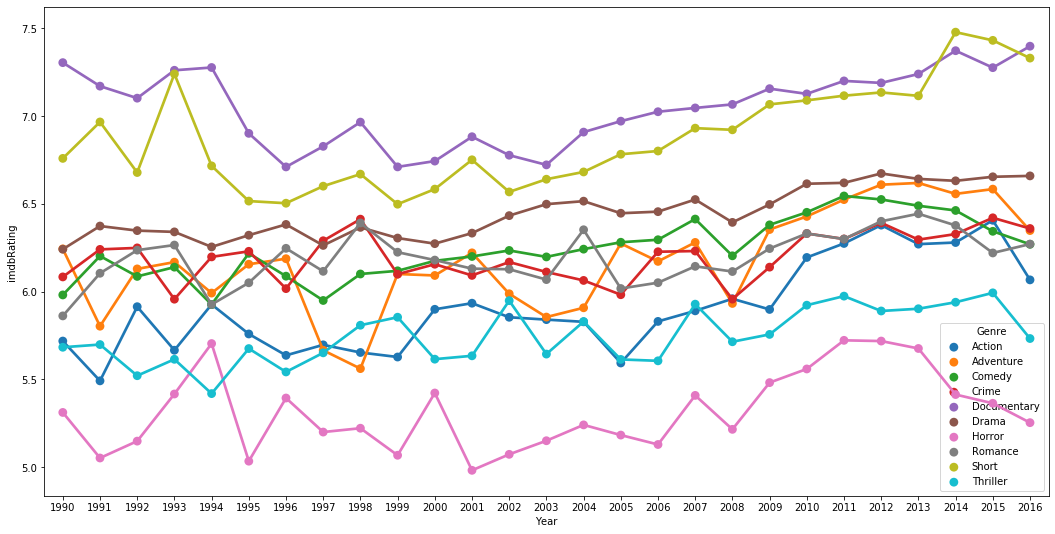

In [81]:
fig, ax = plt.subplots()

fig.set_size_inches(18, 9)
sns.pointplot(x = 'Year', y = 'imdbRating', data = yearGenre['imdbRating'].mean().reset_index(), hue = 'Genre', ax = ax)

#### First Impression
Short and Documentary Movies have been seeing an Up in the last years.